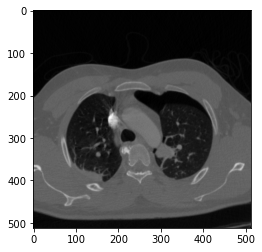

In [1]:
import matplotlib.pyplot as plt
import pydicom

ds = pydicom.dcmread('D0150.dcm',force=True)
img = ds.pixel_array
img = img/img.max()

plt.imshow(img, cmap="gray")

In [39]:
from skimage import feature, segmentation
import numpy as np
import matplotlib
matplotlib.use('TkAgg') 

In [79]:
from imimposemin import imimposemin
from scipy import ndimage as ndi

In [99]:
def WatershedExerciseP2(image):
    
    # imagen de gradiente
    canny_img = feature.canny(image, sigma=0.0001)
    
    # imagen binaria
    plt.ion()
    plt.title("Seleccione puntos con tecla izquierda, \n borre el último punto con tecla derecha,\n finalize con tecla central", fontsize=16)
    plt.imshow(image, cmap = 'gray')
    plt.pause(0.001)
    seed_coord = plt.ginput(-1)
    plt.close()
    
    binary_img = np.zeros(image.shape)
    for coord in seed_coord:
        r, c = int(coord[1]), int(coord[0])
        binary_img[r,c] = 1
    
    markers = ndi.label(binary_img)[0]
    
    #imimposemin
    new_image = imimposemin(canny_img, binary_img)
    
    #watershed
    #waters_img = segmentation.watershed(canny_img, markers)
    waters_img = segmentation.watershed(new_image)
    plt.imshow(waters_img, cmap="gray")
    
    return 0

0

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\gonla\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\gonla\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\gonla\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\gonla\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\gonla\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\gonla\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000159F6738910>
Exception in Tkinter callback
Traceba

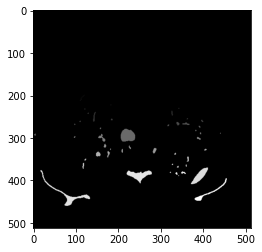

In [100]:
WatershedExerciseP2(img)